### LSTM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


In [2]:
INFOSYS = pd.read_csv("D:/predict/data_techcom.csv")

In [3]:
INFOSYS.head(10)

,Date,Open,High,Low,Close,chance_price,percent_change,Volume
0,2024-05-21,48100.00,48200.00,47050.00,47200.00,-1000,-0.02,11258500
1,2024-05-20,48442.45,48975.86,48054.53,48200.00,-50,0.00,11449601
2,2024-05-17,48248.49,48490.95,48151.51,48248.49,-150,0.00,6610750
3,2024-05-16,47036.22,48442.45,46939.24,48393.96,1800,0.04,21363102
4,2024-05-15,46454.33,46696.78,46308.85,46648.29,200,0.00,10026100
5,2024-05-14,46987.73,46987.73,46405.84,46454.33,-500,-0.01,8835800
6,2024-05-13,47036.22,47181.69,46551.31,46939.24,-100,0.00,12644800
7,2024-05-10,47327.16,47327.16,46454.33,47036.22,50,0.00,7979300
8,2024-05-09,47133.20,47424.14,46357.34,46987.73,250,0.01,11035237
9,2024-05-08,46454.33,47715.09,45872.43,46745.27,300,0.01,15386300


In [4]:
INFOSYS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1000 non-null   object 
 1   Open            1000 non-null   float64
 2   High            1000 non-null   float64
 3   Low             1000 non-null   float64
 4   Close           1000 non-null   float64
 5   chance_price    1000 non-null   int64  
 6   percent_change  1000 non-null   float64
 7   Volume          1000 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 62.6+ KB


In [5]:
 INFOSYS_NEW=INFOSYS.dropna(axis=0)
 INFOSYS_NEW

,Date,Open,High,Low,Close,chance_price,percent_change,Volume
0,2024-05-21,48100.00,48200.00,47050.00,47200.00,-1000,-0.02,11258500
1,2024-05-20,48442.45,48975.86,48054.53,48200.00,-50,0.00,11449601
2,2024-05-17,48248.49,48490.95,48151.51,48248.49,-150,0.00,6610750
3,2024-05-16,47036.22,48442.45,46939.24,48393.96,1800,0.04,21363102
4,2024-05-15,46454.33,46696.78,46308.85,46648.29,200,0.00,10026100
...,...,...,...,...,...,...,...,...
995,2020-05-27,20560.16,20754.12,20269.22,20269.22,-291,-0.01,2673490
996,2020-05-26,20463.18,20657.14,20366.20,20511.67,48,0.00,2830450
997,2020-05-25,20463.18,20657.14,20317.71,20414.69,-48,0.00,2540930
998,2020-05-22,20948.09,20948.09,20414.69,20414.69,-533,-0.03,3672780


In [6]:
INFOSYS_NEW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1000 non-null   object 
 1   Open            1000 non-null   float64
 2   High            1000 non-null   float64
 3   Low             1000 non-null   float64
 4   Close           1000 non-null   float64
 5   chance_price    1000 non-null   int64  
 6   percent_change  1000 non-null   float64
 7   Volume          1000 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 62.6+ KB


In [7]:
INFOSYS_NEW['Close']=pd.to_numeric(INFOSYS_NEW.Close,errors='coerce')
INFOSYS_NEW = INFOSYS_NEW.dropna()
INFOSYS_TRAIN = INFOSYS_NEW.iloc[:,4:5].values

In [8]:
INFOSYS_NEW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1000 non-null   object 
 1   Open            1000 non-null   float64
 2   High            1000 non-null   float64
 3   Low             1000 non-null   float64
 4   Close           1000 non-null   float64
 5   chance_price    1000 non-null   int64  
 6   percent_change  1000 non-null   float64
 7   Volume          1000 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 62.6+ KB


In [9]:
sc = MinMaxScaler(feature_range=(0,1))
INFOSYS_TRAIN = sc.fit_transform(INFOSYS_TRAIN)
INFOSYS_TRAIN.shape

(1000, 1)

In [21]:
x_train = []
y_train = []

for i in range(60, 1226):  # Adjusted range
    if i < len(INFOSYS_TRAIN):  # Check if index is within bounds
        x_train.append(INFOSYS_TRAIN[i-60:i, 0])
        y_train.append(INFOSYS_TRAIN[i, 0])
    else:
        break  # Exit loop if index is out of bounds

x_train, y_train = np.array(x_train), np.array(y_train)


In [22]:
import numpy as np

x_train = np.array(x_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)


(940, 60, 1)


In [23]:
model = Sequential()

model.add(LSTM(units=100, return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences= True))
model.add(Dropout(0.2))


model.add(LSTM(units=100, return_sequences= True))
model.add(Dropout(0.2))


model.add(LSTM(units=100, return_sequences= False))
model.add(Dropout(0.2))


model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
hist = model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
30/30 - 8s - 253ms/step - loss: 0.0349
Epoch 2/20
30/30 - 3s - 96ms/step - loss: 0.0069
Epoch 3/20
30/30 - 3s - 91ms/step - loss: 0.0059
Epoch 4/20
30/30 - 3s - 93ms/step - loss: 0.0057
Epoch 5/20
30/30 - 3s - 94ms/step - loss: 0.0052
Epoch 6/20
30/30 - 3s - 86ms/step - loss: 0.0048
Epoch 7/20
30/30 - 3s - 89ms/step - loss: 0.0044
Epoch 8/20
30/30 - 3s - 86ms/step - loss: 0.0045
Epoch 9/20
30/30 - 3s - 90ms/step - loss: 0.0049
Epoch 10/20
30/30 - 3s - 90ms/step - loss: 0.0042
Epoch 11/20
30/30 - 3s - 93ms/step - loss: 0.0047
Epoch 12/20
30/30 - 3s - 88ms/step - loss: 0.0042
Epoch 13/20
30/30 - 3s - 90ms/step - loss: 0.0038
Epoch 14/20
30/30 - 3s - 87ms/step - loss: 0.0040
Epoch 15/20
30/30 - 3s - 86ms/step - loss: 0.0036
Epoch 16/20
30/30 - 3s - 86ms/step - loss: 0.0038
Epoch 17/20
30/30 - 3s - 88ms/step - loss: 0.0034
Epoch 18/20
30/30 - 5s - 172ms/step - loss: 0.0032
Epoch 19/20
30/30 - 3s - 91ms/step - loss: 0.0030
Epoch 20/20
30/30 - 3s - 88ms/step - loss: 0.0032


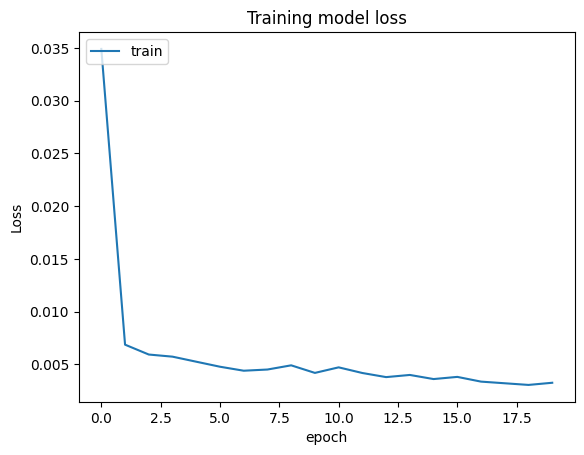

In [25]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [26]:
INFOSYS_NEW.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'chance_price',
       'percent_change', 'Volume'],
      dtype='object')

In [28]:
INFOSYS_TEST = pd.read_csv("D:/predict/data_techcom.csv")
INFOSYS_TEST["Close"]=pd.to_numeric(INFOSYS_TEST.Close, errors='coerce')
INFOSYS_TEST = INFOSYS_TEST.dropna()
INFOSYS_TEST = INFOSYS_TEST.iloc[:,4:5]
y_test = INFOSYS_TEST.iloc[60:,0:].values

inputClosing = INFOSYS_TEST.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
x_test = []
length = len(INFOSYS_TEST)
timestep = 60
for i in range (timestep, length):
  x_test.append(inputClosing_scaled[i-timestep:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape




(940, 60, 1)

In [29]:
y_predict = model.predict(x_test)
y_predict

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step


array([[ 0.56872195],
       [ 0.5630099 ],
       [ 0.5545753 ],
       [ 0.5442171 ],
       [ 0.53277624],
       [ 0.52110946],
       [ 0.50940365],
       [ 0.49697575],
       [ 0.48351118],
       [ 0.46856695],
       [ 0.45236492],
       [ 0.4359026 ],
       [ 0.42070854],
       [ 0.4080607 ],
       [ 0.3987611 ],
       [ 0.3927928 ],
       [ 0.38983655],
       [ 0.38944736],
       [ 0.39076105],
       [ 0.39292893],
       [ 0.39498752],
       [ 0.396105  ],
       [ 0.39595005],
       [ 0.39467603],
       [ 0.39284623],
       [ 0.39073855],
       [ 0.38867745],
       [ 0.38696313],
       [ 0.3855526 ],
       [ 0.38384438],
       [ 0.3813561 ],
       [ 0.37768862],
       [ 0.3725662 ],
       [ 0.3659681 ],
       [ 0.3580929 ],
       [ 0.34908536],
       [ 0.3393163 ],
       [ 0.32943588],
       [ 0.31995034],
       [ 0.31132138],
       [ 0.30375195],
       [ 0.2974759 ],
       [ 0.29234675],
       [ 0.2884482 ],
       [ 0.28580928],
       [ 0

In [30]:
predicted_price = sc.inverse_transform(y_predict)

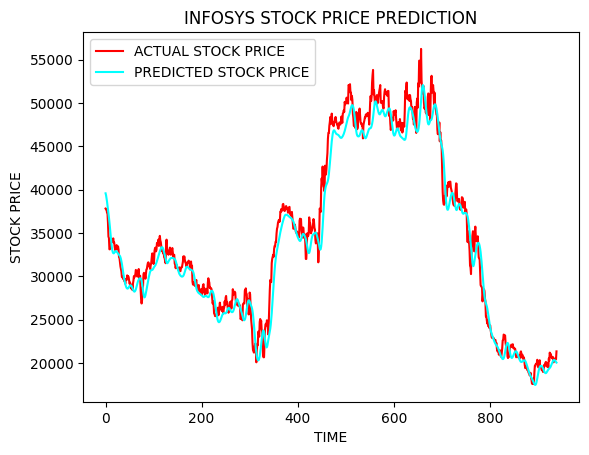

In [31]:
plt.plot(y_test, color='red', label='ACTUAL STOCK PRICE')
plt.plot(predicted_price, color='cyan', label='PREDICTED STOCK PRICE')
plt.title('INFOSYS STOCK PRICE PREDICTION')
plt.xlabel('TIME')
plt.ylabel('STOCK PRICE')
plt.legend()
plt.show()